# 분석 배경

## OO공장의 고객사에서 최근 들어 "Scale 불량 발생 증가"라는 이슈가 발생했다. 그래서 그 원인을 분색하 본 결과 압연공정에서 Scale불량이 급증한 것을 확인할 수 있었다. 그래서 데이터를 수집하여 다양한 분석을 통해 불량 발생의 근본 원인을 찾고 개선을 위한 최적의 조건을 도출하고자 한다.

# Step0. 모듈 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, scale
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy import stats
import graphviz
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

# Step1. 데이터 불러오기

In [2]:
ds = pd.read_csv("SCALE불량.csv", engine = 'python', encoding = "euc-kr")
ds.drop("PLATE_NO", axis = 1, inplace = True)
ds.drop("ROLLING_DATE", axis = 1, inplace = True)
ds['SCALE'] = ds['SCALE'].map(lambda x : 0 if x == "양품" else 1)
ds

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1133,934,적용,8,2조
1,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1135,937,적용,8,2조
2,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1121,889,적용,8,3조
3,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1127,885,적용,8,3조
4,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1128,873,적용,8,1조
5,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,2,1143,127,1128,57,314,1128,874,적용,8,4조
6,0,BV-EH36-TM,T8,38.33,3099,16719,15590,1호기,1,1138,126,1130,50,289,1130,878,적용,8,2조
7,0,BV-EH36-TM,T8,38.33,3099,16719,15590,1호기,2,1139,126,1131,52,294,1131,870,적용,8,4조
8,0,BV-EH36-TM,T8,38.33,3099,16719,15590,2호기,1,1127,126,1122,52,293,1122,873,적용,8,1조
9,0,COMMON,T8,38.43,3129,16187,15280,2호기,2,1135,119,1124,73,298,1124,881,적용,8,4조


>양품 = 0, 불량품 = 1로 구분했다.

# 데이터 정제
    *데이터를 numeric으로 구분

In [3]:
ds_numeric = ds.select_dtypes(exclude = 'object')
ds_numeric.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,0,32.25,3707,15109,14180,1,1144,116,1133,59,282,1133,934,8
1,0,32.25,3707,15109,14180,2,1144,122,1135,53,283,1135,937,8
2,0,33.27,3619,19181,18130,1,1129,116,1121,55,282,1121,889,8
3,0,33.27,3619,19181,18130,2,1152,125,1127,68,316,1127,885,8
4,0,38.33,3098,13334,12430,1,1140,134,1128,48,314,1128,873,8


In [4]:
ds.groupby("FUR_NO").count()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
FUR_NO,,,,,,,,,,,,,,,,,,
1호기,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240
2호기,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237
3호기,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243


In [5]:
ds.isnull().sum()

SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

>결측치는 보이지 않았다.

# Step2. 탐색적 분석

# 탐색적 분석
    1.Pie Chart로 STEEL_KIND(강종)와 Scale비교

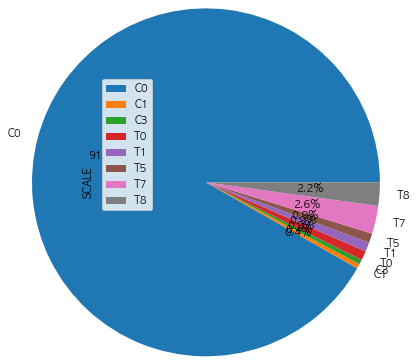

In [6]:
ds_sub = ds[ds["SCALE"] == 1]
ds_count = ds_sub.groupby("STEEL_KIND", as_index = False).agg("count")
ds_count.plot.pie(y = "SCALE", labels = ds_count["STEEL_KIND"], autopct= "%.1f%%", radius = 2)

>pie chart로 확인 결과, 불량의 91%는 강종이 C0일 때 발생했다.

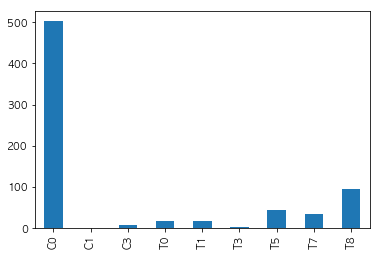

In [7]:
ds_agg = ds["STEEL_KIND"].value_counts()
ds_agg.sort_index(inplace = True)
ds_agg.plot.bar()

In [8]:
ds[ds["STEEL_KIND"] == "T3"]

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
408,0,API-2W-50T,T3,25.23,2616,30128,62440,2호기,2,1151,63,1138,69,250,1138,854,적용,8,4조
409,0,API-2W-50T,T3,25.23,1990,39606,46830,3호기,1,1180,67,1159,65,251,1159,843,적용,8,1조


>전체 제품에서 C0의 비율이 월등히 높아 불량률도 높게 나온 것으로 보인다.

In [9]:
ds_groups = ds.groupby(["STEEL_KIND"])["SCALE"]
ds_w = pd.DataFrame(columns = ["STEEL_KIND", "SCALE_PROB"])
c = 0.0
for name, g in ds_groups:
    c += g.tolist().count(1)/(g.shape[0])
    ds_w = ds_w.append({"STEEL_KIND" : name , "SCALE_PROB" : (g.tolist().count(1)/(g.shape[0])) * 100}, ignore_index = True )
ds_w


,STEEL_KIND,SCALE_PROB
0,C0,42.147117
1,C1,100.000000
2,C3,14.285714
3,T0,12.500000
4,T1,11.111111
5,T3,0.000000
6,T5,4.651163
7,T7,17.142857
8,T8,5.263158


Text(0, 0.5, 'SCALE')

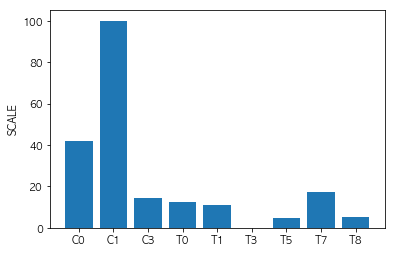

In [10]:
plt.bar(ds_w.STEEL_KIND, ds_w.SCALE_PROB)
plt.ylabel("SCALE")

>C1의 불량률이 100%인 이유는 ,강종이 C1인 제품이 하나였기 때문이다. 이를 제외하고 본다면, C0에서 불량률이 가장 높다고 할 수 있다.

# 탐색적 분석
    2.Pie Chart로 WORK_GR(작업조)별 Scale 불량률 비교

In [11]:
ds_groups = ds.groupby(["WORK_GR"])["SCALE"]
ds_w = pd.DataFrame(columns = ["WORK_GR", "PROB"])
for name, g in ds_groups:
    ds_w = ds_w.append({"WORK_GR" : name , "PROB" : g.tolist().count(1)/(g.shape[0])}, ignore_index = True )
ds_w

,WORK_GR,PROB
0,1조,0.354497
1,2조,0.272727
2,3조,0.313953
3,4조,0.335052


>우선 데이터를 작업조 그룹에 맞춰 불량률로 정제했다.

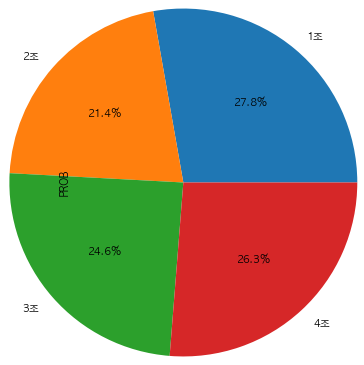

In [12]:
ds_w.plot.pie(y = "PROB", labels = ds_w["WORK_GR"], autopct= "%.1f%%", radius = 2, legend = False)

>Pie chart로 비교한 결과, 1조의 불량률이 가장 높았다.

# 탐색적 분석
    3.FUR_NO(가열로 호기) 별 Scale 비교

In [13]:
ds_groups = ds.groupby(["FUR_NO"])["SCALE"]
ds_w = pd.DataFrame(columns = ["FUR_NO", "SCALE_PROB"])
c = 0.0
for name, g in ds_groups:
    c += g.tolist().count(1)/(g.shape[0])
    ds_w = ds_w.append({"FUR_NO" : name , "SCALE_PROB" : (g.tolist().count(1)/(g.shape[0])) * 100}, ignore_index = True )
ds_w

,FUR_NO,SCALE_PROB
0,1호기,30.416667
1,2호기,29.535865
2,3호기,36.213992


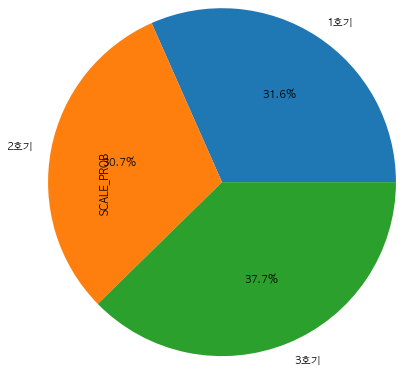

In [14]:
ds_w.plot.pie(y = "SCALE_PROB", labels = ds_w["FUR_NO"], autopct= "%.1f%%", radius = 2, legend = False)

>Pie Chart로 비교한 결과, 가열로 3호기에서 불량률이 가장 높게 발생했다.

# 탐색적 분석
    4.HSB적용 별 Scale비교(1 : 적용, 0 : 미적용)

In [15]:
ds_groups = ds.groupby(["HSB"])["SCALE"]
ds_w = pd.DataFrame(columns = ["HSB", "SCALE_PROB"])
c = 0.0
for name, g in ds_groups:
    ds_w = ds_w.append({"HSB" : name , "SCALE_PROB" : (g.tolist().count(1)/(g.shape[0]))}, ignore_index = True )
ds_w

,HSB,SCALE_PROB
0,미적용,1.00000
1,적용,0.28821


>HSB를 미적용하면, Scale이 무조건 발생한다. 따라서 Scale을 줄이기 위해선, 최우선적으로 HSB를 적용해야 한다

# 탐색적 분석
    5.SPEC별 SCALE 비교

In [16]:
len(ds.groupby(["SPEC"]))

66

In [17]:
ds_specs = ds.groupby(["SPEC"])["SCALE"]
ds_specs = pd.DataFrame(columns = ["SPEC", "SCALE_PROB"])
c = 0.0
for name, g in ds_groups:
    c += g.tolist().count(1)/(g.shape[0])
    ds_specs = ds_specs.append({"SPEC" : name , "SCALE_PROB" : (g.tolist().count(1)/(g.shape[0])) * 100}, ignore_index = True )
ds_specs.sort_values("SCALE_PROB", ascending = False)


,SPEC,SCALE_PROB
0,미적용,100.000000
1,적용,28.820961


>SPEC의 종류가 66가지이기 때문에, 개별적으로 나누기 보단 군집화를 통해 SPEC을 묶어야 할 것 같다.

# 탐색적 분석
    6. 각 변수들의 상관도 비교

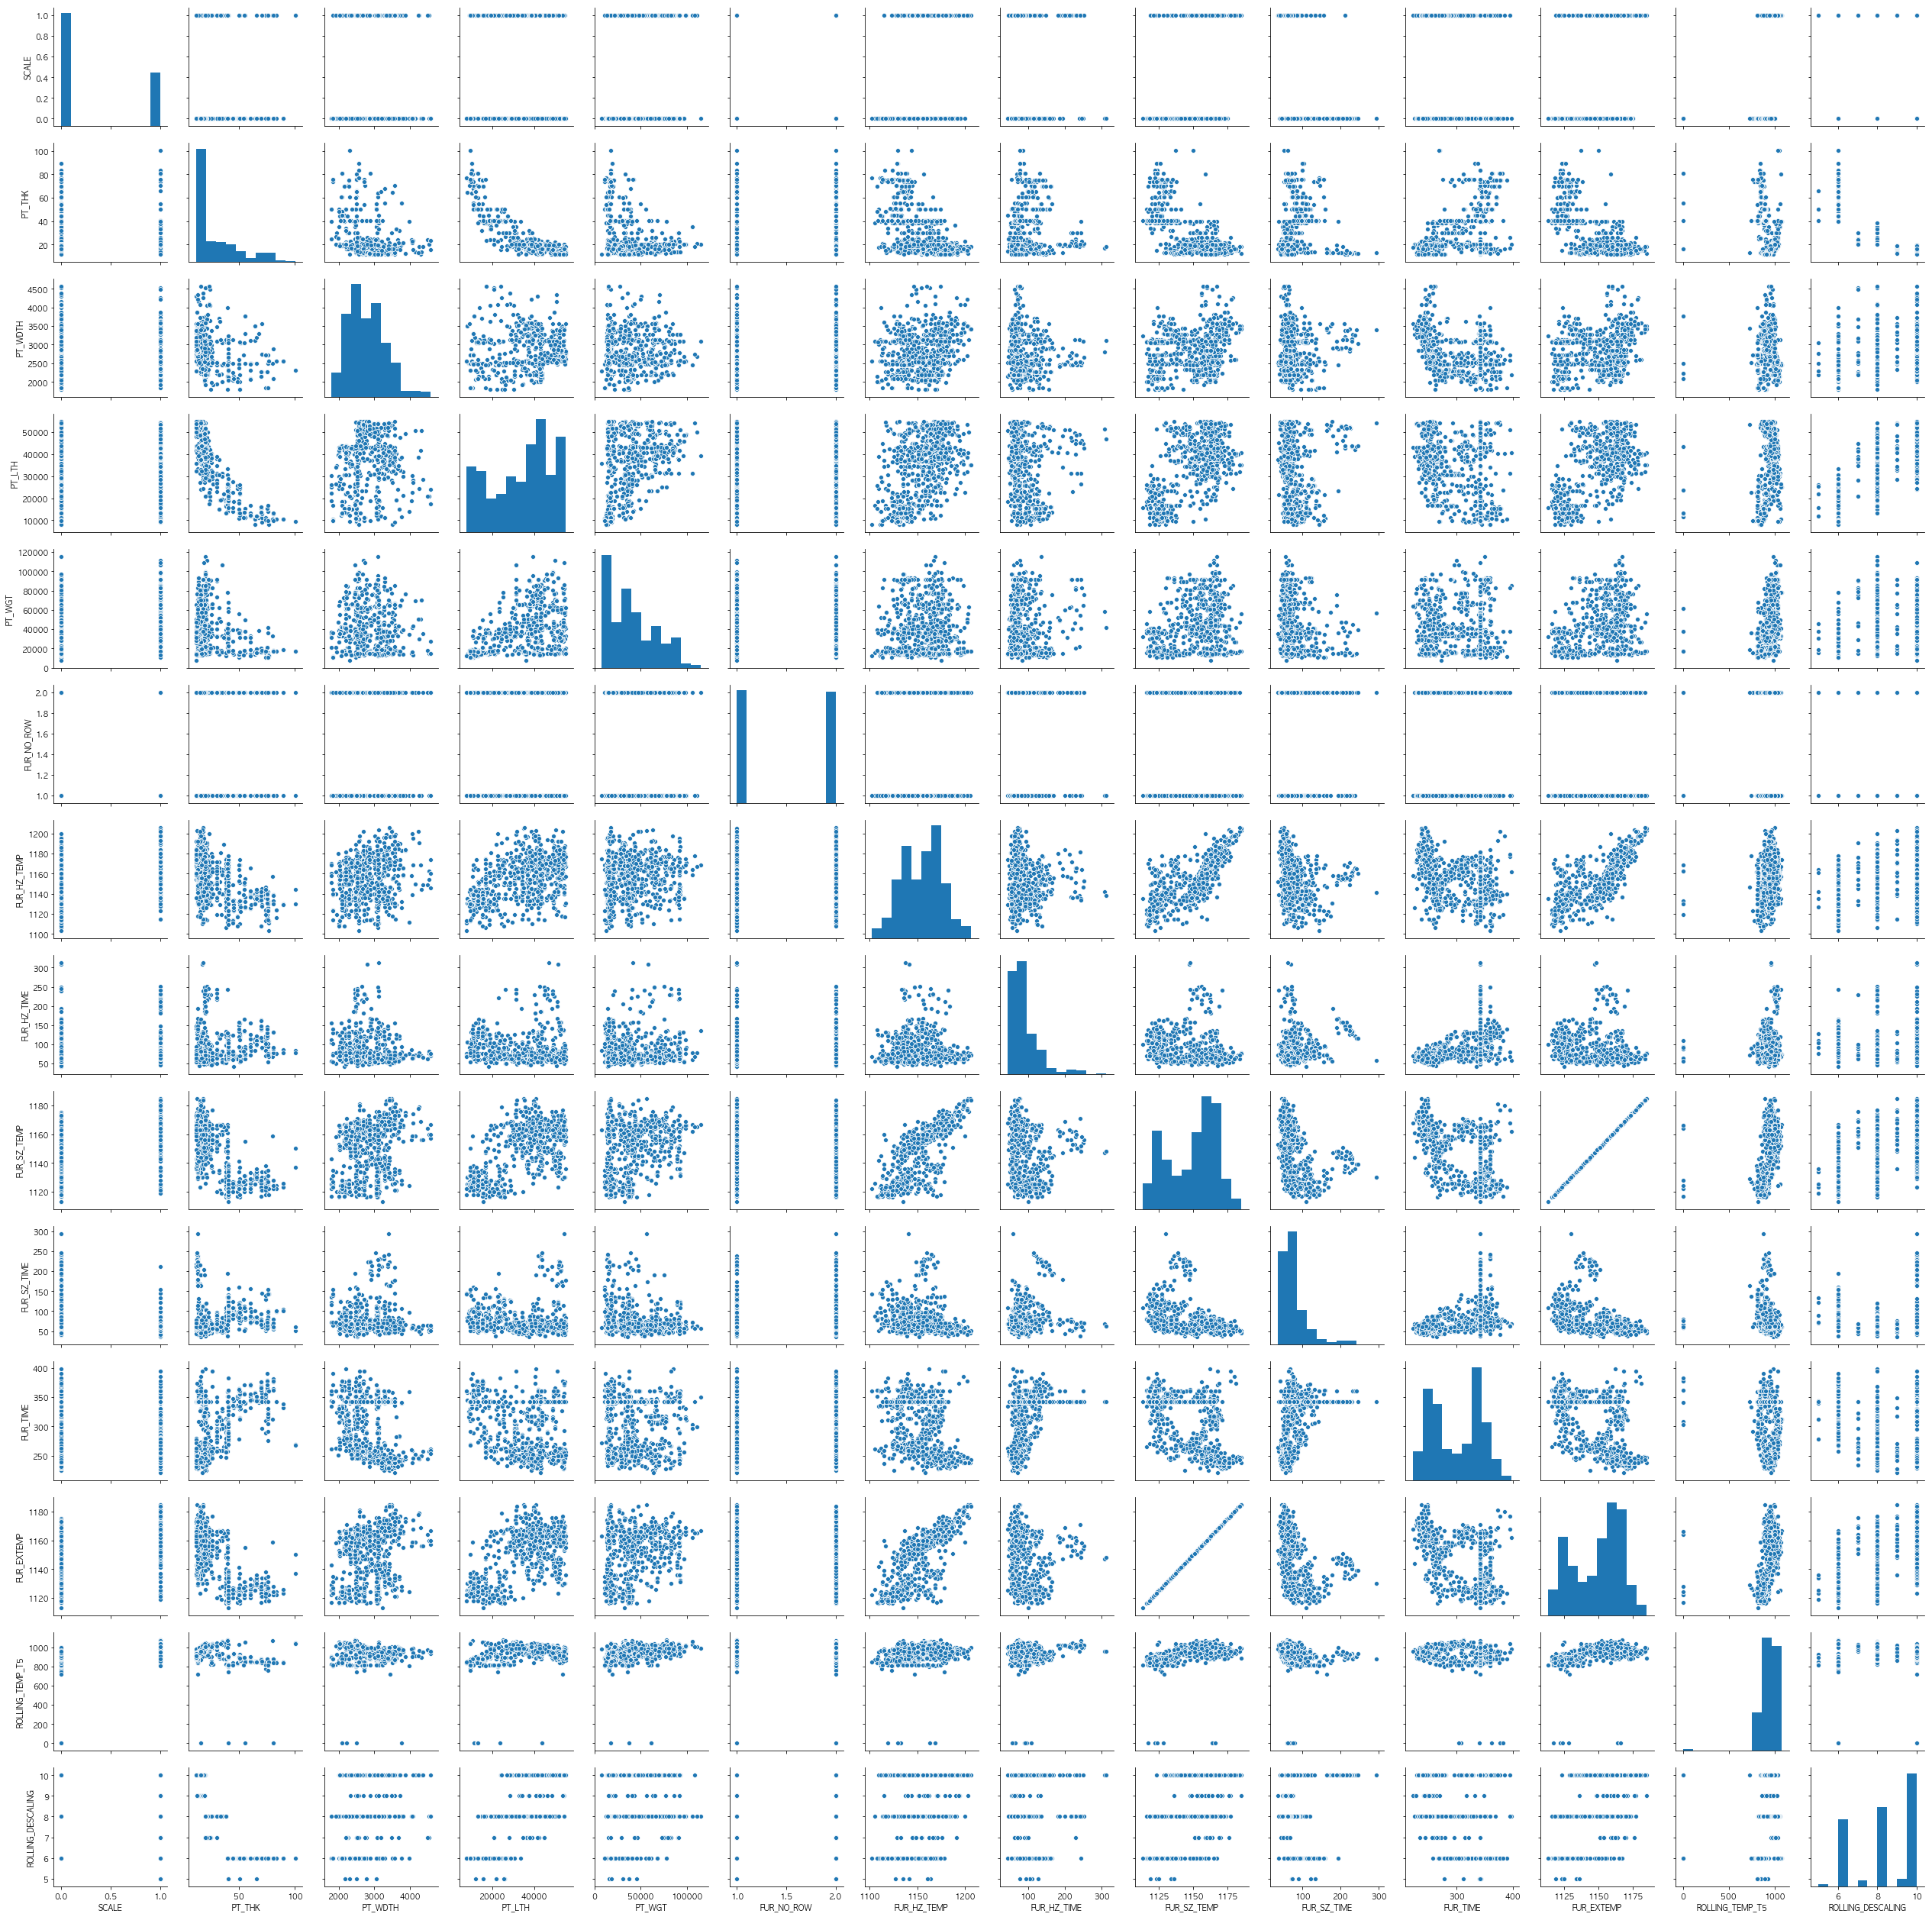

In [18]:
sns.pairplot(ds)

>산점도 확인 결과, FUR_SZ_TEMP(가열로 균열대 온도)와 FUR_EXTEMP(압연온도)가 완벽히 비례해 하나만 사용해도 될 것 같다.

In [19]:
ds.corr().round(3)

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
SCALE,1.000,-0.125,-0.206,0.100,0.219,-0.023,0.248,0.056,0.375,-0.240,-0.049,0.375,0.385,-0.007
PT_THK,-0.125,1.000,-0.313,-0.863,-0.397,-0.003,-0.524,0.160,-0.695,0.113,0.413,-0.695,-0.374,-0.837
PT_WDTH,-0.206,-0.313,1.000,0.120,0.031,0.007,0.180,-0.119,0.227,0.023,-0.393,0.227,-0.022,0.338
PT_LTH,0.100,-0.863,0.120,1.000,0.452,-0.021,0.473,-0.077,0.645,-0.070,-0.252,0.645,0.313,0.809
PT_WGT,0.219,-0.397,0.031,0.452,1.000,-0.022,0.153,0.010,0.360,-0.191,-0.058,0.360,0.263,0.239
FUR_NO_ROW,-0.023,-0.003,0.007,-0.021,-0.022,1.000,0.005,-0.016,0.009,0.049,0.016,0.009,-0.004,0.018
FUR_HZ_TEMP,0.248,-0.524,0.180,0.473,0.153,0.005,1.000,-0.114,0.773,-0.222,-0.348,0.773,0.265,0.471
FUR_HZ_TIME,0.056,0.160,-0.119,-0.077,0.010,-0.016,-0.114,1.000,-0.203,0.178,0.473,-0.203,0.012,-0.138
FUR_SZ_TEMP,0.375,-0.695,0.227,0.645,0.360,0.009,0.773,-0.203,1.000,-0.451,-0.477,1.000,0.452,0.649
FUR_SZ_TIME,-0.240,0.113,0.023,-0.070,-0.191,0.049,-0.222,0.178,-0.451,1.000,0.443,-0.451,-0.207,-0.106


>분석 결과, PT_LTH와 PT_THK의 상관계수가 -0.863, FUR_EXTEMP와 PT_THK의 상관계수가 -0.695등으로, 변수간의 상관관계가 있는 것으로 보인다. 그리고 앞서 본 가열로 균열대 온도(FUR_SZ_TEMP)와 압연온도(FUR_EXTEMP)의 상관계수가 1이기때문에 FUR_EXTEMP를 지워도 될 것 같다.

In [20]:
ds.drop("FUR_EXTEMP", axis = 1, inplace = True)
ds

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,934,적용,8,2조
1,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,937,적용,8,2조
2,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,889,적용,8,3조
3,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,885,적용,8,3조
4,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,873,적용,8,1조
5,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,2,1143,127,1128,57,314,874,적용,8,4조
6,0,BV-EH36-TM,T8,38.33,3099,16719,15590,1호기,1,1138,126,1130,50,289,878,적용,8,2조
7,0,BV-EH36-TM,T8,38.33,3099,16719,15590,1호기,2,1139,126,1131,52,294,870,적용,8,4조
8,0,BV-EH36-TM,T8,38.33,3099,16719,15590,2호기,1,1127,126,1122,52,293,873,적용,8,1조
9,0,COMMON,T8,38.43,3129,16187,15280,2호기,2,1135,119,1124,73,298,881,적용,8,4조


In [21]:
ds_numeric = ds.select_dtypes(exclude = 'object')
ds_numeric.shape

(720, 13)

In [22]:
ds_numeric_x = ds_numeric.drop("SCALE", axis = 1)
ds_numeric_y = ds_numeric["SCALE"]
ds_numeric_x.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,ROLLING_DESCALING
0,32.25,3707,15109,14180,1,1144,116,1133,59,282,934,8
1,32.25,3707,15109,14180,2,1144,122,1135,53,283,937,8
2,33.27,3619,19181,18130,1,1129,116,1121,55,282,889,8
3,33.27,3619,19181,18130,2,1152,125,1127,68,316,885,8
4,38.33,3098,13334,12430,1,1140,134,1128,48,314,873,8


# 탐색적 분석
    7. 연속형 변수와 Scale의 상관관계 히스토그램으로 분석

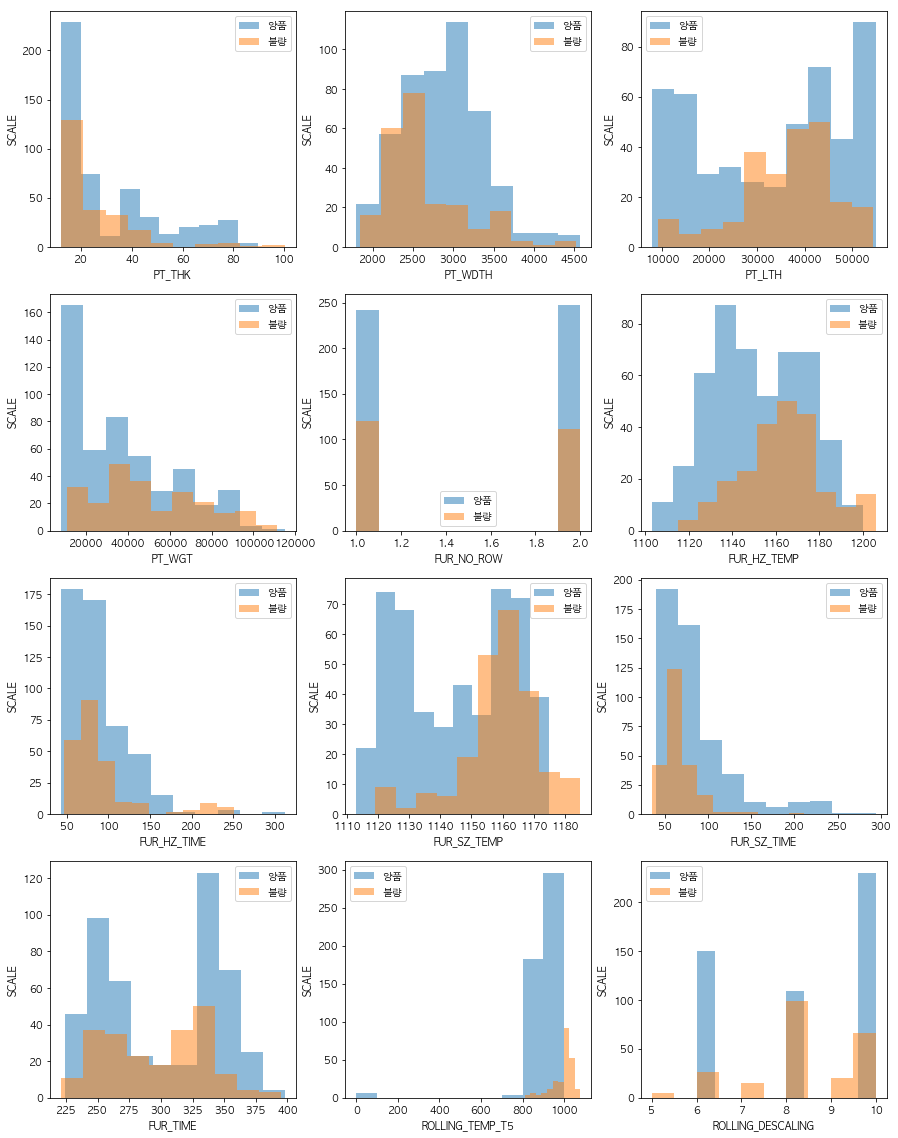

In [23]:
i = 0
fig = plt.figure(figsize = (15, 20))
columns = ds_numeric_x.columns
for col in ds_numeric_x.columns:
    plt.subplot(ds_numeric_x.shape[1]//3, 3, i+1)
    i += 1
    plt.hist(ds[ds["SCALE"] == 0][col], label = "양품", alpha = 0.5)
    plt.hist(ds[ds["SCALE"] == 1][col], label = "불량", alpha = 0.5)
    plt.xlabel(col)
    plt.ylabel("SCALE")
    plt.legend()
plt.show()

>분석결과 Plate 폭이 작을수록, 가열로 가열대 온도가 높을수록, 가열로 균열대 온도가 높을수록, 가열대 온도가 높을수록 불량이 되는 경향을 보였다.

# Step3. 기술적 분석

---
# 군집분석
    1. SPEC을 군집화하기

In [24]:
ds_spec_cluster = ds.groupby(["SPEC"]).mean()
ds_spec_cluster

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,ROLLING_DESCALING
SPEC,,,,,,,,,,,,,
A131-DH36TM,1.000000,70.700000,3570.000000,9175.000000,18180.000000,2.000000,1128.000000,92.000000,1121.000000,145.000000,342.000000,859.000000,6.000000
A283-C,0.833333,23.715000,2600.833333,32302.166667,64680.000000,1.500000,1166.666667,69.500000,1161.333333,68.166667,309.166667,1014.000000,8.500000
A516-60,0.500000,12.800000,3871.000000,49414.000000,76880.000000,1.500000,1183.500000,72.500000,1174.000000,66.500000,246.000000,904.000000,10.000000
A709-36,0.000000,26.240000,2800.000000,28920.000000,33360.000000,1.000000,1150.000000,63.000000,1154.000000,59.000000,264.000000,993.000000,8.000000
AB/A,0.571429,18.397143,3373.714286,39287.714286,52818.571429,2.000000,1161.000000,108.714286,1160.142857,103.857143,296.000000,956.857143,9.285714
AB/AH32,0.200000,15.386000,2803.400000,48285.000000,46486.000000,1.400000,1169.800000,70.200000,1161.600000,65.800000,265.000000,945.800000,9.400000
AB/B,0.500000,16.930000,3407.833333,37222.166667,50928.333333,1.500000,1162.666667,76.000000,1166.500000,60.833333,248.000000,960.666667,10.000000
AB/EH32-TM,0.000000,32.250000,3707.000000,15109.000000,14180.000000,1.500000,1144.000000,119.000000,1134.000000,56.000000,282.500000,935.500000,8.000000
AB/EH36-TM,0.058824,69.290000,2797.529412,10611.411765,15643.529412,1.470588,1125.647059,77.294118,1124.529412,103.941176,341.588235,848.941176,6.000000


In [25]:
scaler = StandardScaler()
ds_scaled = scaler.fit_transform(ds_spec_cluster)
ds_scaled[:5]

array([[ 1.95773419,  2.1499355 ,  1.73700104, -1.74771662, -1.25776103,
         1.95839094, -1.66301458,  0.18829753, -1.58469214,  2.09803071,
         1.25625549, -0.80998091, -1.30899652],
       [ 1.46523265, -0.39132357, -0.4856216 , -0.01696303,  1.35975396,
         0.01042527,  0.80900329, -0.72560099,  0.90126525, -0.51615736,
         0.30758681,  1.27625905,  0.25876096],
       [ 0.48022957, -0.98167884,  2.42729451,  1.26362475,  2.04649982,
         0.01042527,  1.88518348, -0.60374786,  1.68197914, -0.57286426,
        -1.51751688, -0.20429834,  1.19941545],
       [-0.99727504, -0.25475489, -0.02886596, -0.27007216, -0.40326904,
        -1.93754039, -0.25652166, -0.98961612,  0.449273  , -0.82804531,
        -0.99743456,  0.99360718, -0.05479054],
       [ 0.69130166, -0.6789484 ,  1.28685239,  0.50581012,  0.69206649,
         1.95839094,  0.44672481,  0.86719358,  0.82788988,  0.69818039,
        -0.07284377,  0.50713833,  0.75148474]])

In [26]:
ds_y = ds_scaled[:, 0]
ds_x = ds_scaled[:, 1::]

Text(0, 0.5, 'sample index')

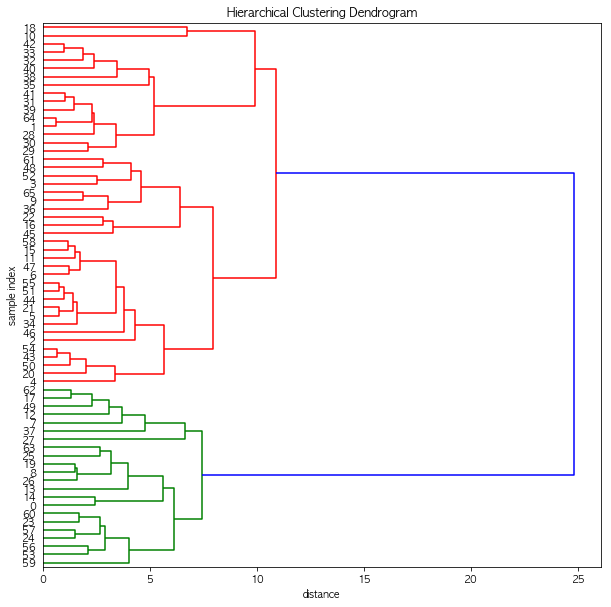

In [27]:
Z_ward = linkage(ds_x, method = "ward", metric = "euclidean")
plt.figure(figsize = (10, 10))
ax = plt.subplot(111)
dendrogram(Z_ward, leaf_font_size = 10, orientation = "right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

# 군집분석
    2. 계층적 군집화를 이용해 SPEC을 6가지로 군집화

In [28]:
cluster_hierarchical = fcluster(Z= Z_ward, t = 7, criterion = "distance")
ds_spec_cluster["ClusterHierarchical"] = cluster_hierarchical.astype('str')
ds_spec_cluster.groupby(['ClusterHierarchical']).mean()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,ROLLING_DESCALING
ClusterHierarchical,,,,,,,,,,,,,
1,0.235072,51.068916,2608.818083,18560.077245,28698.679270,1.568678,1139.656745,90.443172,1125.042552,110.579895,329.450897,830.132337,5.973867
2,0.146939,55.460320,3242.555102,12983.390476,19966.693878,1.361224,1134.495238,98.719048,1129.956463,76.788435,319.076871,892.902721,6.563265
3,0.304659,16.250204,3099.692758,44483.310257,41617.460861,1.532950,1169.091980,78.093474,1161.906092,73.807817,272.150748,948.947734,9.655128
4,0.150000,23.942250,2630.050000,34950.325000,45015.750000,1.450000,1155.800000,63.025000,1148.550000,68.700000,259.750000,899.375000,8.475000
5,0.695399,23.145456,2564.186341,38796.097977,59230.608145,1.405110,1157.631995,95.958614,1157.626331,70.034533,309.205618,999.548256,8.548094
6,0.500000,16.245000,2903.500000,42135.000000,37920.000000,2.000000,1160.000000,169.500000,1145.500000,154.000000,351.000000,947.500000,10.000000


In [29]:
ds_spec_cluster

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,ROLLING_DESCALING,ClusterHierarchical
SPEC,,,,,,,,,,,,,,
A131-DH36TM,1.000000,70.700000,3570.000000,9175.000000,18180.000000,2.000000,1128.000000,92.000000,1121.000000,145.000000,342.000000,859.000000,6.000000,1
A283-C,0.833333,23.715000,2600.833333,32302.166667,64680.000000,1.500000,1166.666667,69.500000,1161.333333,68.166667,309.166667,1014.000000,8.500000,5
A516-60,0.500000,12.800000,3871.000000,49414.000000,76880.000000,1.500000,1183.500000,72.500000,1174.000000,66.500000,246.000000,904.000000,10.000000,3
A709-36,0.000000,26.240000,2800.000000,28920.000000,33360.000000,1.000000,1150.000000,63.000000,1154.000000,59.000000,264.000000,993.000000,8.000000,4
AB/A,0.571429,18.397143,3373.714286,39287.714286,52818.571429,2.000000,1161.000000,108.714286,1160.142857,103.857143,296.000000,956.857143,9.285714,3
AB/AH32,0.200000,15.386000,2803.400000,48285.000000,46486.000000,1.400000,1169.800000,70.200000,1161.600000,65.800000,265.000000,945.800000,9.400000,3
AB/B,0.500000,16.930000,3407.833333,37222.166667,50928.333333,1.500000,1162.666667,76.000000,1166.500000,60.833333,248.000000,960.666667,10.000000,3
AB/EH32-TM,0.000000,32.250000,3707.000000,15109.000000,14180.000000,1.500000,1144.000000,119.000000,1134.000000,56.000000,282.500000,935.500000,8.000000,2
AB/EH36-TM,0.058824,69.290000,2797.529412,10611.411765,15643.529412,1.470588,1125.647059,77.294118,1124.529412,103.941176,341.588235,848.941176,6.000000,1


# 군집분석
    3. 원본데이터에 군집번호 부여

In [30]:
ds_cluster = pd.merge(ds, ds_spec_cluster['ClusterHierarchical'], on=["SPEC"])
ds_cluster

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,ClusterHierarchical
0,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,934,적용,8,2조,2
1,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,937,적용,8,2조,2
2,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,889,적용,8,3조,2
3,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,885,적용,8,3조,2
4,0,NV-E36-TM,T8,60.58,3105,12386,18290,2호기,2,1125,90,1128,90,345,845,적용,6,4조,2
5,0,NV-E36-TM,T8,65.64,3195,11832,19480,1호기,2,1142,121,1135,75,346,853,적용,6,1조,2
6,0,NV-E36-TM,T8,70.60,2265,12913,16210,1호기,1,1129,91,1126,61,296,842,적용,6,3조,2
7,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,873,적용,8,1조,2
8,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,2,1143,127,1128,57,314,874,적용,8,4조,2
9,0,BV-EH36-TM,T8,38.33,3099,16719,15590,1호기,1,1138,126,1130,50,289,878,적용,8,2조,2


In [31]:
ds_cluster.groupby(['ClusterHierarchical']).count()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
ClusterHierarchical,,,,,,,,,,,,,,,,,,
1,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147
2,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
3,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278
4,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
5,224,224,224,224,224,224,224,224,224,224,224,224,224,224,224,224,224,224
6,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


---
# 로지스틱 회귀
    1. train, test 데이터 나누기

In [32]:
np.random.seed(seed = 1234)
msk = np.random.rand(ds_cluster.shape[0],) < 0.7
ds_train = ds_cluster[msk]
ds_test = ds_cluster[~msk]
print("train data size : {}".format(ds_train.shape))
print("test data size : {}".format(ds_test.shape))

train data size : (493, 19)
test data size : (227, 19)


In [33]:
ds_train = sm.add_constant(ds_train)
ds_train.head()

/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,ClusterHierarchical
0,1.0,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,934,적용,8,2조,2
1,1.0,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,937,적용,8,2조,2
2,1.0,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,889,적용,8,3조,2
5,1.0,0,NV-E36-TM,T8,65.64,3195,11832,19480,1호기,2,1142,121,1135,75,346,853,적용,6,1조,2
6,1.0,0,NV-E36-TM,T8,70.60,2265,12913,16210,1호기,1,1129,91,1126,61,296,842,적용,6,3조,2


# 로지스틱 회귀
    2. 설명변수로 원래의 변수들과, Spec을 군집화한 ClusterHierarchical을 사용하기

In [34]:
log_model = sm.Logit.from_formula("""SCALE ~C(STEEL_KIND) + PT_THK + PT_WDTH + PT_LTH + PT_WGT + C(FUR_NO)+
                                    FUR_NO_ROW + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_TIME + ROLLING_TEMP_T5+
                                    C(HSB) + ROLLING_DESCALING + C(WORK_GR) + C(ClusterHierarchical)""", 
                                 ds_train)
log_result = log_model.fit(method = 'bfgs')
print(log_result.summary())

         Current function value: 0.290528
         Iterations: 35
         Function evaluations: 55
         Gradient evaluations: 44


/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  493
Model:                          Logit   Df Residuals:                      462
Method:                           MLE   Df Model:                           30
Date:                Mon, 18 Feb 2019   Pseudo R-squ.:                  0.5379
Time:                        01:16:22   Log-Likelihood:                -143.23
converged:                      False   LL-Null:                       -309.97
                                        LLR p-value:                 6.170e-53
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.3209     20.662     -0.016      0.988     -40.818      40.177
C(STEEL_KIND)[T.C1]             0.1737      2.839      0.061      0.951      -5.

>로지스틱 회귀모델의 설명력은 0.5379이다.

# 로지스틱 회귀
    3. 정확도 예측

In [35]:
train_y_pred = log_result.predict(ds_train)
train_y_pred_class = (train_y_pred > 0.5).astype(int)
log_train_acc = metrics.accuracy_score(ds_train["SCALE"], train_y_pred_class)

y_pred = log_result.predict(ds_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()
print(log_train_acc)

log_f1_score = f1_score(ds_test["SCALE"], y_pred_class)
print(log_f1_score)

0.8782961460446247
0.7862068965517242


In [36]:
log_test_acc = metrics.accuracy_score(ds_test["SCALE"], y_pred_class)
print("Accuracy : {0:.3f}".format(metrics.accuracy_score(ds_test["SCALE"], y_pred_class)))

Accuracy : 0.863


>로지스틱 회귀모델로 0.863의 정확도를 보였다.

# 로지스틱 회귀
    4. 설명변수 중요도 체크

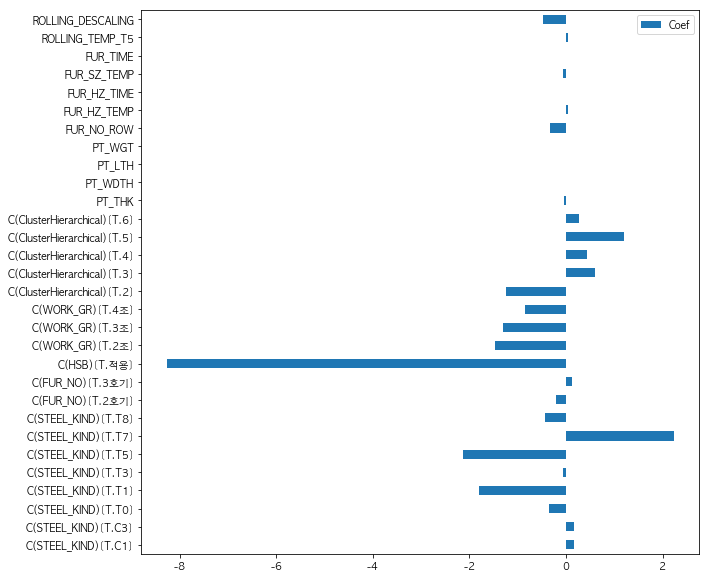

In [37]:
ds_logistic_coef = pd.DataFrame({"Coef":log_result.params.values[1:]}, index = log_model.exog_names[1:])
ds_logistic_coef.plot.barh(y = "Coef", figsize = (10, 10))

>중요도를 따져본 결과, HSB가 가장 큰 영향을 차지했다. HSB를 적용할 경우 SCALE 발생률이 가장 낮아진다. 강종이 T7인 경우 SCALE일 가능성이 높아진다. 반면 T5, T1을 사용하면 SCALE 발생률이 낮아질 수 있다. SPEC Cluster 5군집이 SCALE 발생 확률을 높인다. 연속형 변수의 경우, ROLLIN DESCALING(압연간 DESCALING 횟수)가 높을수록 Scale발생이 적어질 수 있다. 그리고 FUR_NO_ROW(가열로 작업 순번)이 증가할수록 Scale발생이 적어질 수 있다.

In [38]:
ds_spec_cluster[ds_spec_cluster["ClusterHierarchical"] == '5']

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,ROLLING_DESCALING,ClusterHierarchical
SPEC,,,,,,,,,,,,,,
A283-C,0.833333,23.715000,2600.833333,32302.166667,64680.000000,1.500000,1166.666667,69.500000,1161.333333,68.166667,309.166667,1014.000000,8.500000,5
JS-SM400B,0.600000,18.100000,2520.000000,42675.000000,61120.000000,1.800000,1164.200000,87.800000,1160.000000,60.200000,323.200000,1001.600000,10.000000,5
JS-SM490A,0.806452,31.069032,2410.677419,31357.967742,41917.419355,1.548387,1154.774194,81.870968,1154.967742,74.838710,284.741935,1019.903226,7.677419,5
JS-SM490YA,0.800000,19.100000,2040.000000,38774.000000,35580.000000,1.400000,1159.000000,72.200000,1158.600000,61.600000,284.200000,1024.800000,10.000000,5
JS-SM490YB,0.416667,17.416667,2746.833333,42593.583333,73218.452381,1.476190,1153.750000,83.440476,1155.773810,69.142857,307.357143,955.619048,9.190476,5
JS-SS400,0.894737,34.044737,2572.473684,29600.105263,72812.105263,1.473684,1152.263158,115.421053,1156.631579,60.842105,304.210526,1029.473684,7.526316,5
KR-A,0.629630,20.975185,2697.148148,40861.296296,58797.037037,1.518519,1156.962963,107.666667,1155.407407,78.407407,301.666667,990.962963,8.148148,5
KR-B,1.000000,15.590000,3105.000000,54290.000000,82520.000000,1.000000,1148.000000,103.000000,1153.000000,91.000000,356.000000,937.000000,10.000000,5
KS-SM400A,0.750000,37.540000,2480.000000,27233.750000,50085.000000,1.000000,1150.000000,140.500000,1152.000000,87.000000,309.250000,1031.500000,6.250000,5


>Spec Cluster 5군집에 속해있는 SPEC들은 위와 같다. 위 제품규격들은 지양해야 할 것 같다.

# 로지스틱 회귀
    5. 표준화 회귀계수 중요도 체크

In [39]:
ds_cluster["ClusterHierarchical"] = ds_cluster["ClusterHierarchical"].astype('str')
ds_char = ds_cluster.select_dtypes(include = "object")
ds_numeric = ds_cluster.select_dtypes(exclude = "object")
#ds_numeric.drop("ClusterHierarchical", axis = 1, inplace = True)
#ds_char["ClusterHierarchical"] = ds_cluster["ClusterHierarchical"]
ds_char_train = ds_char[msk]
ds_numeric_scaled_train = scale(ds_numeric[msk])
ds_numeric_scaled_train = pd.DataFrame(ds_numeric_scaled_train, columns = ds_numeric.columns)
ds_numeric_scaled_train.head()

/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys


,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,ROLLING_DESCALING
0,-0.689962,0.149416,1.711217,-1.400830,-1.137269,-1.014301,-0.553880,0.682606,-0.934304,-0.536906,-0.370641,-0.008040,-0.171630
1,-0.689962,0.149416,1.711217,-1.400830,-1.137269,0.985901,-0.553880,0.835537,-0.821436,-0.705215,-0.348763,0.022294,-0.171630
2,-0.689962,0.203946,1.545747,-1.099638,-0.972269,-1.014301,-1.268828,0.682606,-1.611508,-0.649112,-0.370641,-0.463056,-0.171630
3,-0.689962,1.934474,0.748480,-1.643219,-0.915877,0.985901,-0.649206,0.810048,-0.821436,-0.088081,1.029559,-0.827069,-1.397913
4,-0.689962,2.199640,-1.000241,-1.563261,-1.052471,-1.014301,-1.268828,0.045393,-1.329339,-0.480802,-0.064347,-0.938295,-1.397913


In [40]:
ds_numeric_scaled_train["SCALE"] = np.where(ds_numeric_scaled_train["SCALE"] > 0, 1, 0)
ds_numeric_scaled_train.head()
ds_scaled_train = pd.concat([ds_numeric_scaled_train, ds_char_train.reset_index(drop = True)], axis = 1)
ds_scaled_train

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,ROLLING_DESCALING,SPEC,STEEL_KIND,FUR_NO,HSB,WORK_GR,ClusterHierarchical
0,0,0.149416,1.711217,-1.400830,-1.137269,-1.014301,-0.553880,0.682606,-0.934304,-0.536906,-0.370641,-0.008040,-0.171630,AB/EH32-TM,T1,1호기,적용,2조,2
1,0,0.149416,1.711217,-1.400830,-1.137269,0.985901,-0.553880,0.835537,-0.821436,-0.705215,-0.348763,0.022294,-0.171630,AB/EH32-TM,T1,1호기,적용,2조,2
2,0,0.203946,1.545747,-1.099638,-0.972269,-1.014301,-1.268828,0.682606,-1.611508,-0.649112,-0.370641,-0.463056,-0.171630,NV-E36-TM,T8,2호기,적용,3조,2
3,0,1.934474,0.748480,-1.643219,-0.915877,0.985901,-0.649206,0.810048,-0.821436,-0.088081,1.029559,-0.827069,-1.397913,NV-E36-TM,T8,1호기,적용,1조,2
4,0,2.199640,-1.000241,-1.563261,-1.052471,-1.014301,-1.268828,0.045393,-1.329339,-0.480802,-0.064347,-0.938295,-1.397913,NV-E36-TM,T8,1호기,적용,3조,2
5,0,0.474458,0.567967,-1.281744,-1.078370,0.985901,-0.792196,0.937491,-1.047171,-0.733266,-0.108104,-0.655174,-0.171630,BV-EH36-TM,T8,1호기,적용,4조,2
6,0,0.474458,0.567967,-1.281744,-1.078370,-1.014301,-1.364155,0.937491,-1.555074,-0.733266,-0.129982,-0.624840,-0.171630,BV-EH36-TM,T8,2호기,적용,1조,2
7,0,1.122939,-1.498532,-0.706210,-0.108004,0.985901,-2.174430,0.861025,-1.893676,0.080229,0.767021,-0.756289,-1.397913,BV-EH36-TM,T8,1호기,적용,1조,2
8,0,1.663428,-1.338703,-1.291803,-0.356130,-1.014301,-0.696869,0.606140,-0.934304,-0.144184,0.723265,-0.837181,-1.397913,BV-EH36-TM,T8,1호기,적용,1조,2
9,0,2.041931,0.951558,-1.703280,-0.114688,-1.014301,-0.887522,0.529675,-1.216472,-0.088081,0.920168,-0.847292,-1.397913,BV-EH36-TM,T8,2호기,적용,2조,2


         Current function value: 0.270695
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


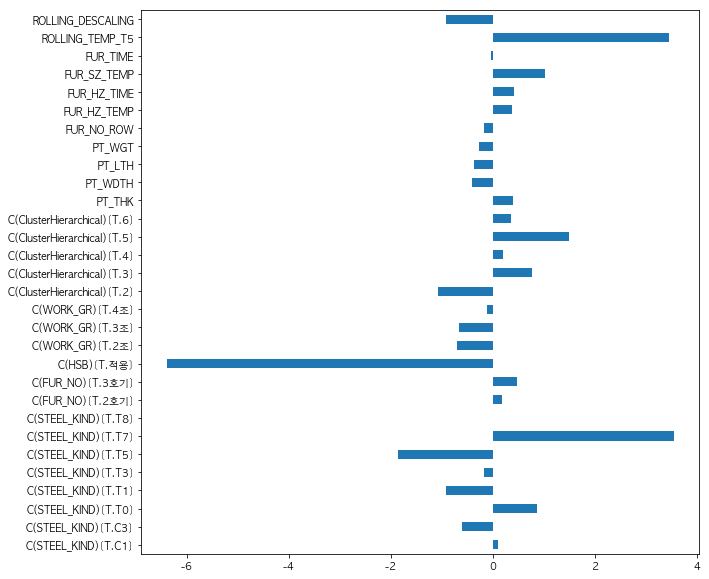

In [41]:
scaled_log_model = sm.Logit.from_formula("""SCALE ~C(STEEL_KIND) + PT_THK + PT_WDTH + PT_LTH + PT_WGT + C(FUR_NO)+
                                    FUR_NO_ROW + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_TIME + ROLLING_TEMP_T5+
                                    C(HSB) + ROLLING_DESCALING + C(WORK_GR) + C(ClusterHierarchical) + 1""", 
                                 ds_scaled_train)
scaled_log_result = scaled_log_model.fit(method = "bfgs")
ds_log_scaled_coef = pd.DataFrame({"Coef" : scaled_log_result.params.values[1:]},
                                 index=scaled_log_model.exog_names[1:])
ds_log_scaled_coef.plot.barh(y = "Coef", legend = False, figsize= (10, 10))

>표준화하여 중요도를 확인한 결과, ROLLING_TEMP_T5(가열대 온도), FUR_SZ_TEMP(가열로 균열대 온도)가 높을수록 SCALE이 발생한다. 표준화했을때 두 변수의 영향력이 커짐을 알 수 있었다.

# 의사결정트리
    1. 데이터구성 - 더미변수 생성

In [42]:
ds_temp = ds_cluster.drop("SPEC", axis = 1, inplace = False)
#ds_temp["ClusterHierarhcical"] = ds_temp["ClusterHierarchical"].astype('str')
ds_dummy = pd.get_dummies(ds_temp)
ds_dummy.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,...,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조,ClusterHierarchical_1,ClusterHierarchical_2,ClusterHierarchical_3,ClusterHierarchical_4,ClusterHierarchical_5,ClusterHierarchical_6
0,0,32.25,3707,15109,14180,1,1144,116,1133,59,...,0,1,0,0,0,1,0,0,0,0
1,0,32.25,3707,15109,14180,2,1144,122,1135,53,...,0,1,0,0,0,1,0,0,0,0
2,0,33.27,3619,19181,18130,1,1129,116,1121,55,...,0,0,1,0,0,1,0,0,0,0
3,0,33.27,3619,19181,18130,2,1152,125,1127,68,...,0,0,1,0,0,1,0,0,0,0
4,0,60.58,3105,12386,18290,2,1125,90,1128,90,...,0,0,0,1,0,1,0,0,0,0


# 의사결정트리
    2. 데이터 분할

In [43]:
ds_y = ds_dummy["SCALE"]
ds_x = ds_dummy.drop("SCALE", axis = 1, inplace = False)
ds_train_x, ds_test_x, ds_train_y, ds_test_y = train_test_split(ds_x, ds_y, test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(ds_train_x.shape))
print("train data Y size : {}".format(ds_train_y.shape))
print("test data X size : {}".format(ds_test_x.shape))
print("test data Y size : {}".format(ds_test_y.shape))


train data X size : (504, 36)
train data Y size : (504,)
test data X size : (216, 36)
test data Y size : (216,)


# 의사결정트리
    3. 의사결정나무 모델생성(GridSearchCV 이용)

In [44]:
param_grid = {'criterion' : ['gini','entropy'],'max_depth' : [i for i in range(1, 11, 1)], 'min_samples_leaf': [i*10 for i in range(1, 6, 1)]}
train_accuracy = []; test_accuracy = [];
param_criterion = []; param_depth = [];
#for criterion in list_criterion:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(ds_train_x, ds_train_y)
train_accuracy.append(tree.score(ds_train_x, ds_train_y))
test_accuracy.append(tree.score(ds_test_x, ds_test_y))
print(tree.best_params_)

tree_train_acc = tree.score(ds_train_x, ds_train_y)
tree_test_acc = tree.score(ds_test_x, ds_test_y)
tree_f1_score = f1_score(ds_test_y, tree.predict(ds_test_x))

ds_gridsearch = pd.DataFrame()
ds_gridsearch['TrainAccuracy'] = train_accuracy
ds_gridsearch['TestAccuracy'] = test_accuracy
ds_gridsearch

/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}


,TrainAccuracy,TestAccuracy
0,0.982143,0.986111


>GridSearchCV를 이용해 파라미터를 찾은 결과, entropy, max_depth = 5, min_samples_leaf=10 이라는 최적의 파라미터를 구했다.

# 의사결정나무
    4. 의사결정나무 모델 시각화

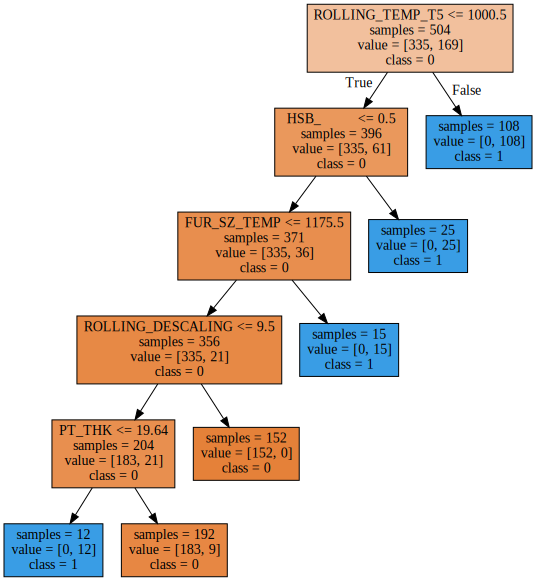

In [45]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=10, random_state=1234)
tree.fit(ds_train_x, ds_train_y)
export_graphviz(tree, out_file = "tree.dot", class_names=["0", "1"],
               feature_names=ds_train_x.columns, impurity=False, filled = True)
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

> 우선 부모노드에서 ROLLING_TEMP_T5(가열대 온도)가 1000.5를 넘어가면 SCALE발생으로 분류한다. 그 다음으로 HSB적용여부를 두고 미적용시에 SCALE로 분류한다.

# 의사결정나무
    5. 설명변수 중요도 확인

In [46]:
ds_feature_importance = pd.DataFrame()
ds_feature_importance["Feature"] = ds_train_x.columns
ds_feature_importance["Importance"] = tree.feature_importances_
ds_feature_importance.sort_values("Importance", ascending = False, inplace = True)
ds_feature_importance.round(3)

,Feature,Importance
10,ROLLING_TEMP_T5,0.531
24,HSB_미적용,0.182
7,FUR_SZ_TEMP,0.135
0,PT_THK,0.110
11,ROLLING_DESCALING,0.043
22,FUR_NO_2호기,0.000
23,FUR_NO_3호기,0.000
25,HSB_적용,0.000
26,WORK_GR_1조,0.000
27,WORK_GR_2조,0.000


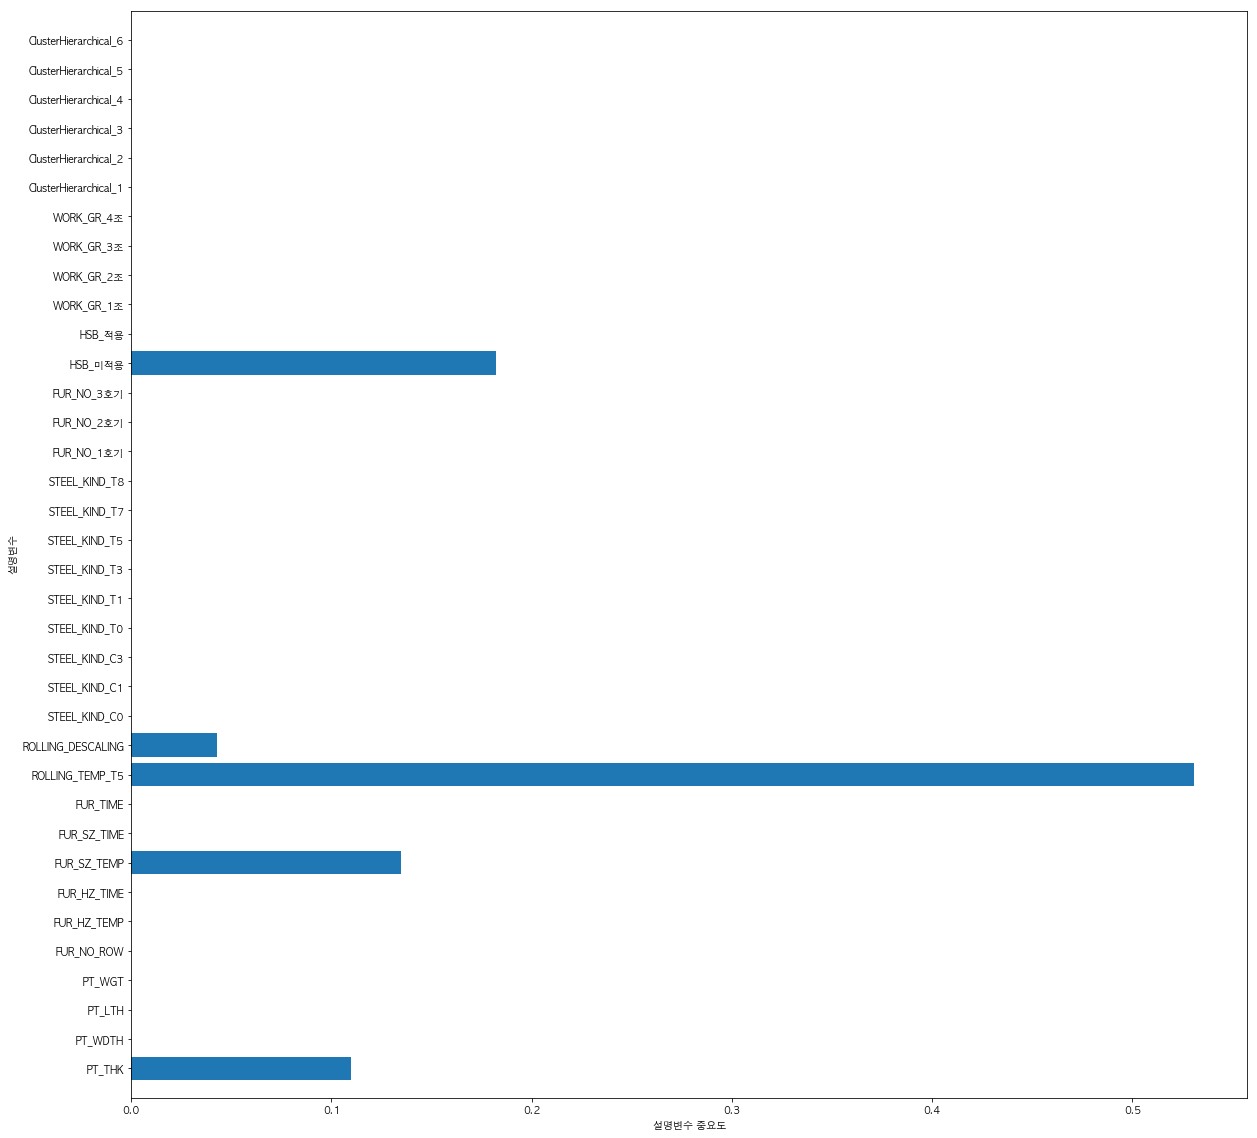

In [47]:
def plot_feature_importance(model):
    n_features = ds_train_x.shape[1]
    fig = plt.figure(figsize = (20, 20))
    plt.barh(range(n_features), model.feature_importances_, align = "center")
    plt.yticks(np.arange(n_features), ds_train_x.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1, n_features)
plot_feature_importance(tree)

>DataFrame과 bar chart로 비교해본 결과, ROLLING_TEMP_T5(가열대 온도), HSB(적용, 미적용), FUR_SZ_TEMP(가열로 균열대 온도), PT_THK(Plate 두께), ROLLING_DESCALING(압연중 Descaling 횟수)순으로 유의한 변수를 선택했다.

# 랜덤포레스트
    1. GridSearchCV를 이용해 최적의 파라미터 찾기

In [48]:
ds_train_x_scaled = scale(ds_train_x, axis = 0)
ds_test_x_scaled = scale(ds_test_x, axis = 0)
pd.DataFrame(ds_train_x_scaled, columns = ds_train_x.columns).head()
ds_train_x.columns

/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  


Index(['PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT', 'FUR_NO_ROW', 'FUR_HZ_TEMP',
       'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME',
       'ROLLING_TEMP_T5', 'ROLLING_DESCALING', 'STEEL_KIND_C0',
       'STEEL_KIND_C1', 'STEEL_KIND_C3', 'STEEL_KIND_T0', 'STEEL_KIND_T1',
       'STEEL_KIND_T3', 'STEEL_KIND_T5', 'STEEL_KIND_T7', 'STEEL_KIND_T8',
       'FUR_NO_1호기', 'FUR_NO_2호기', 'FUR_NO_3호기', 'HSB_미적용', 'HSB_적용',
       'WORK_GR_1조', 'WORK_GR_2조', 'WORK_GR_3조', 'WORK_GR_4조',
       'ClusterHierarchical_1', 'ClusterHierarchical_2',
       'ClusterHierarchical_3', 'ClusterHierarchical_4',
       'ClusterHierarchical_5', 'ClusterHierarchical_6'],
      dtype='object')

In [49]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(ds_train_x, ds_train_y)
print("Accuracy on training set : {:.3f}".format(rf_uncustomized.score(ds_train_x, ds_train_y)))
print("Accuracy on test set : {:.3f}".format(rf_uncustomized.score(ds_test_x, ds_test_y)))
rf_train_acc = rf_uncustomized.score(ds_train_x, ds_train_y)
rf_test_acc = rf_uncustomized.score(ds_test_x, ds_test_y)
rf_f1_score = f1_score(ds_test_y, rf_uncustomized.predict(ds_test_x))

Accuracy on training set : 0.992
Accuracy on test set : 0.972


/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [50]:
rf_model = RandomForestClassifier(random_state=1234)
rf_model.fit(ds_train_x, ds_train_y)
ds_feature_importance = pd.DataFrame()
ds_feature_importance["feature"] = ds_train_x.columns
ds_feature_importance["importance"] = rf_model.feature_importances_
ds_feature_importance.sort_values(by="importance",ascending=False, inplace = True)
ds_feature_importance

/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,feature,importance
10,ROLLING_TEMP_T5,0.242582
7,FUR_SZ_TEMP,0.147535
1,PT_WDTH,0.096860
24,HSB_미적용,0.063643
11,ROLLING_DESCALING,0.057736
25,HSB_적용,0.057320
2,PT_LTH,0.048621
34,ClusterHierarchical_5,0.040971
9,FUR_TIME,0.038100
5,FUR_HZ_TEMP,0.038087


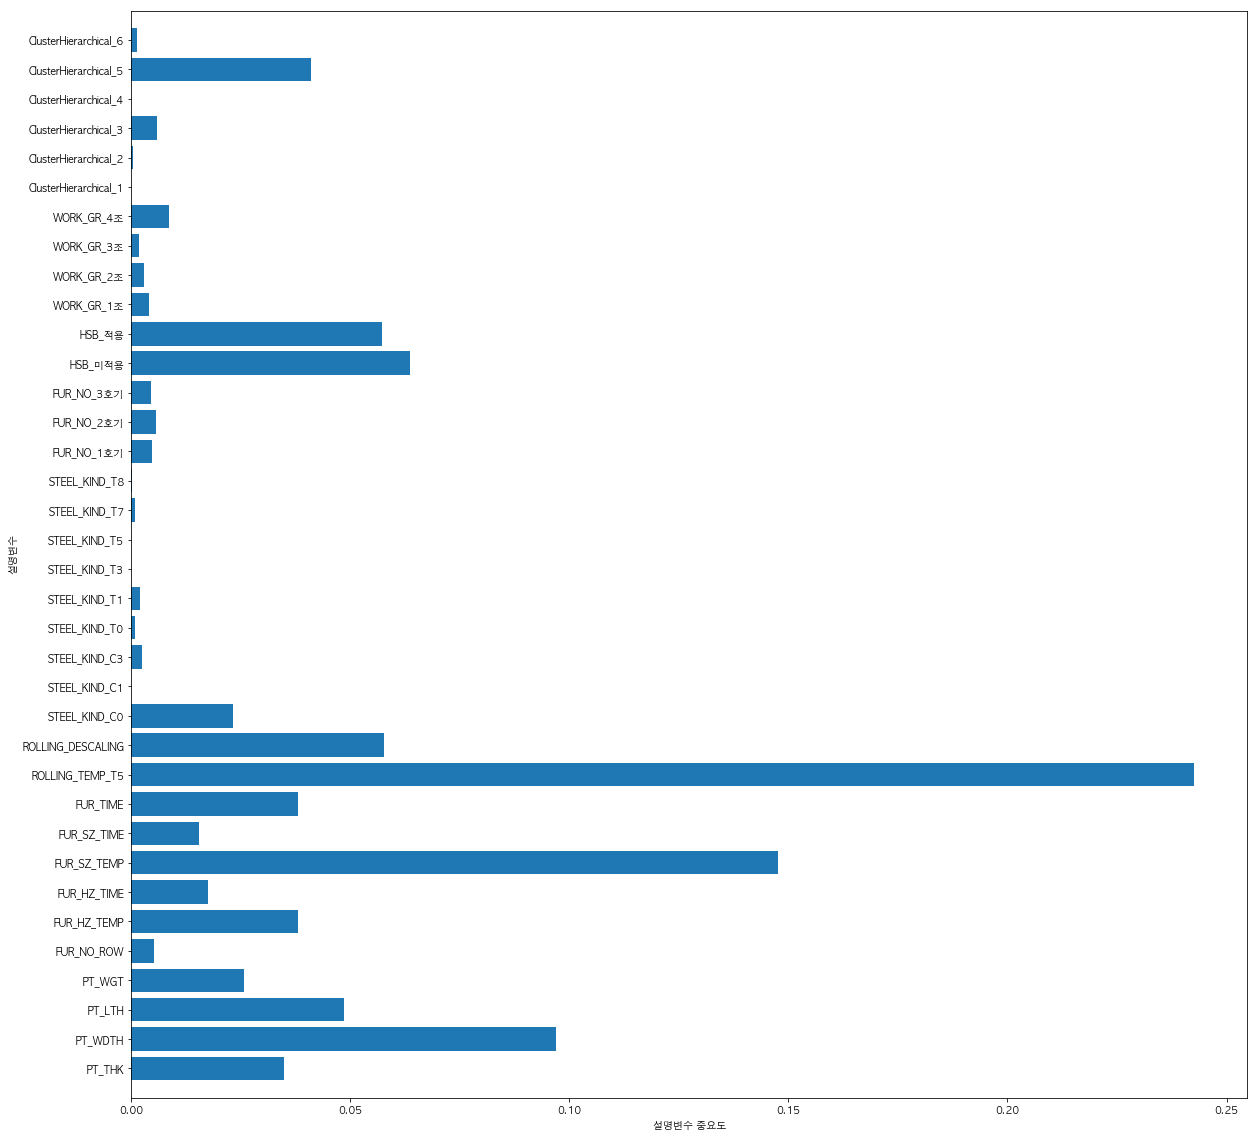

In [51]:

def plot_feature_importances(model):
    n_features = ds_train_x.shape[1]
    fig = plt.figure(figsize = (20, 20))
    plt.barh(range(n_features), model.feature_importances_, align = "center")
    plt.yticks(np.arange(n_features), ds_train_x.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1, n_features)
plot_feature_importances(rf_model)

>랜덤포레스트를 통해 설명변수 중요도를 확인한 결과,ROLLING_TEMP_T5(가열대 온도), FUR_SZ_TEMP(가열로 균열대 온도), PT_WDTH(Plate 폭), HSB 적용여부, SPEC의 5번째 군집 등이 중요한 변수로 작용하는 것을 다시금 확인했다.

# 그래디언트 부스팅
    1. 모델 생성

In [52]:
gb = GradientBoostingClassifier(random_state= 1234)
gb.fit(ds_train_x, ds_train_y)
print("Accuracy on training set : {:.3f}".format(gb.score(ds_train_x, ds_train_y)))
print("Accuracy on test set : {:.3f}".format(gb.score(ds_test_x, ds_test_y)))
gb_train_acc = gb.score(ds_train_x, ds_train_y)
gb_test_acc = gb.score(ds_test_x, ds_test_y)
gb_f1_score = f1_score(ds_test_y, gb.predict(ds_test_x))

Accuracy on training set : 1.000
Accuracy on test set : 0.991


# 그래디언트 부스팅
    2. 스케일 조정 후 모델 생성

In [53]:
ds_train_x_scaled = scale(ds_train_x, axis = 0)
ds_test_x_scaled = scale(ds_test_x, axis = 0)
pd.DataFrame(ds_train_x_scaled, columns = ds_train_x.columns).head()

/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  


,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조,ClusterHierarchical_1,ClusterHierarchical_2,ClusterHierarchical_3,ClusterHierarchical_4,ClusterHierarchical_5,ClusterHierarchical_6
0,1.126514,0.464620,-1.550821,-1.040461,1.032266,-1.561662,-0.819452,-1.502074,0.679570,0.846153,...,-0.571241,-0.552901,-0.562074,1.604515,2.009975,-0.289605,-0.781168,-0.186836,-0.666428,-0.063119
1,-0.235045,-0.656047,-0.166547,1.453845,-0.968742,-0.458103,0.328578,-0.067298,-0.877141,-0.537809,...,-0.571241,-0.552901,1.779126,-0.623241,-0.497519,-0.289605,-0.781168,-0.186836,1.500538,-0.063119
2,-0.496423,-1.122048,0.207350,0.425434,1.032266,-0.170218,0.250303,0.104875,-1.065020,-0.783351,...,-0.571241,-0.552901,1.779126,-0.623241,-0.497519,-0.289605,-0.781168,-0.186836,1.500538,-0.063119
3,1.877325,-0.595674,-1.582052,-1.034339,-0.968742,-0.793968,0.276395,-1.157727,0.169613,1.180983,...,-0.571241,1.808642,-0.562074,-0.623241,2.009975,-0.289605,-0.781168,-0.186836,-0.666428,-0.063119
4,1.346759,0.921188,-1.652012,-0.370361,-0.968742,-0.841949,0.015479,-1.042945,0.089093,0.935441,...,-0.571241,-0.552901,-0.562074,1.604515,-0.497519,3.452981,-0.781168,-0.186836,-0.666428,-0.063119


In [54]:

gb_scaled = GradientBoostingClassifier(random_state= 1234)
gb_scaled.fit(ds_train_x_scaled, ds_train_y)
print("Accuracy on trainig set : {:.3f}".format(gb_scaled.score(ds_train_x_scaled, ds_train_y)))
print("Accuracy on test set : {:.3f}".format(gb_scaled.score(ds_test_x_scaled, ds_test_y)))

Accuracy on trainig set : 1.000
Accuracy on test set : 0.824


>scale조정후, 정확도가 오히려 낮아졌다.

# 그래디언트 부스팅
    3. 설명변수 중요도 확인

In [55]:
ds_feature_importance = pd.DataFrame()
ds_feature_importance["feature"] = ds_train_x.columns
ds_feature_importance["importance"] = gb.feature_importances_
ds_feature_importance.sort_values(by="importance",ascending=False, inplace = True)
ds_feature_importance.round(3)

,feature,importance
10,ROLLING_TEMP_T5,0.561
7,FUR_SZ_TEMP,0.124
24,HSB_미적용,0.094
11,ROLLING_DESCALING,0.092
25,HSB_적용,0.081
0,PT_THK,0.031
9,FUR_TIME,0.005
5,FUR_HZ_TEMP,0.003
1,PT_WDTH,0.002
34,ClusterHierarchical_5,0.002


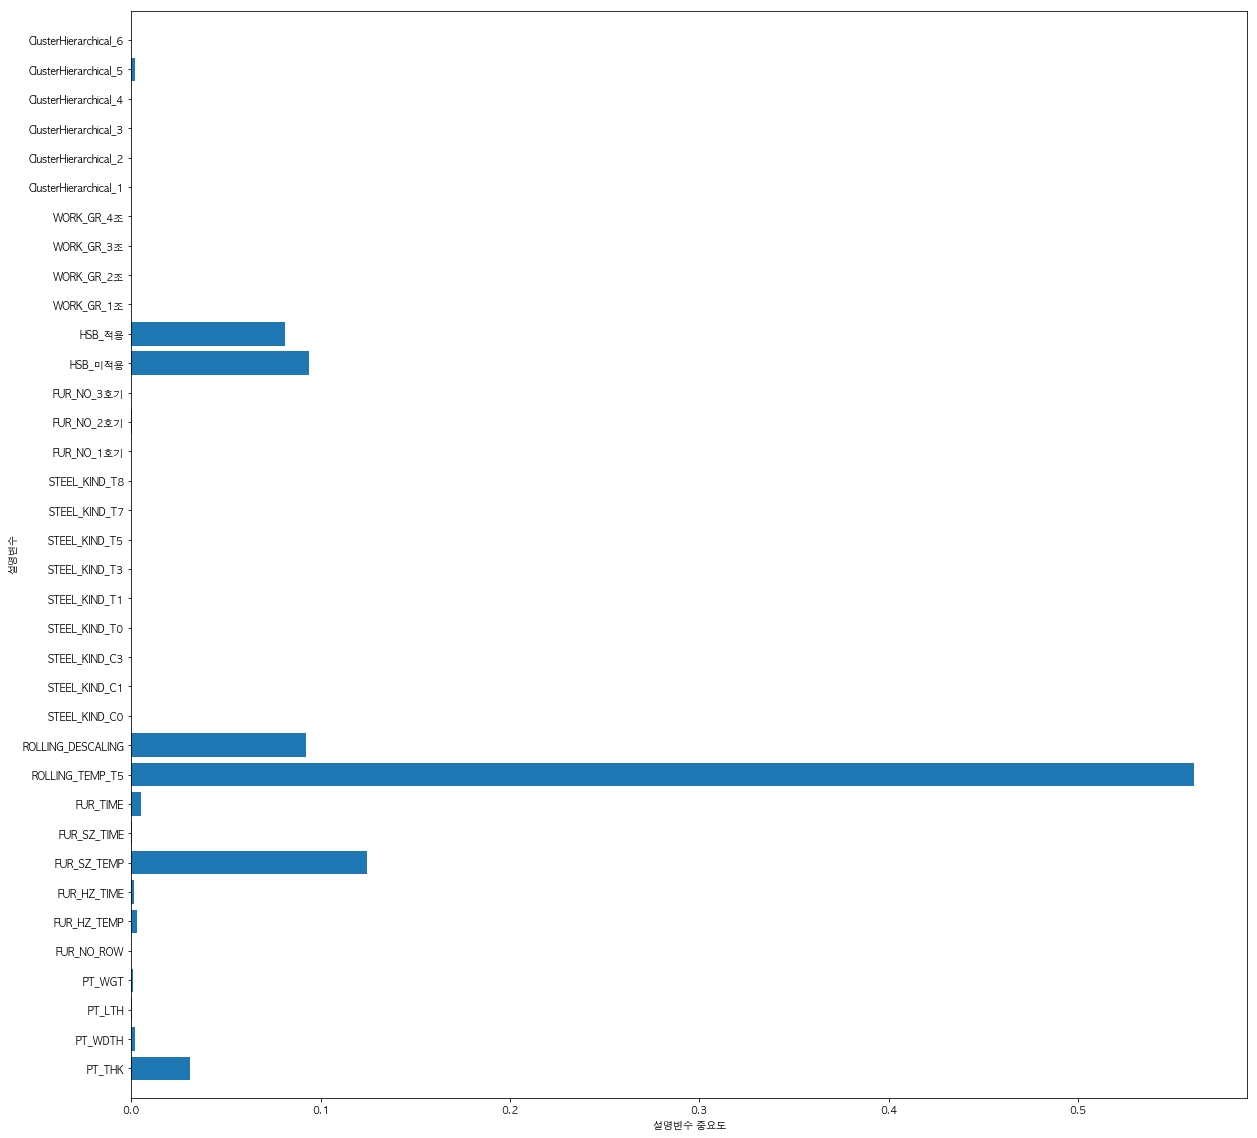

In [56]:

def plot_feature_importances(model):
    n_features = ds_train_x.shape[1]
    fig = plt.figure(figsize = (20, 20))
    plt.barh(range(n_features), model.feature_importances_, align = "center")
    plt.yticks(np.arange(n_features), ds_train_x.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1, n_features)
plot_feature_importances(gb)

>scale조정을 하지 않았을 때, ROLLING_TEMP_T5, FUR_SZ_TEMP, HSB적용여부, ROLLING_DESCALING, PT_THK 순으로 유의한 변수를 확인했다.

In [57]:
ds_feature_importance = pd.DataFrame()
ds_feature_importance["feature"] = ds_train_x.columns
ds_feature_importance["importance"] = gb_scaled.feature_importances_
ds_feature_importance.sort_values(by="importance",ascending=False, inplace = True)
ds_feature_importance.round(3)

,feature,importance
10,ROLLING_TEMP_T5,0.561
7,FUR_SZ_TEMP,0.124
24,HSB_미적용,0.094
11,ROLLING_DESCALING,0.092
25,HSB_적용,0.081
0,PT_THK,0.031
9,FUR_TIME,0.005
5,FUR_HZ_TEMP,0.003
1,PT_WDTH,0.002
34,ClusterHierarchical_5,0.002


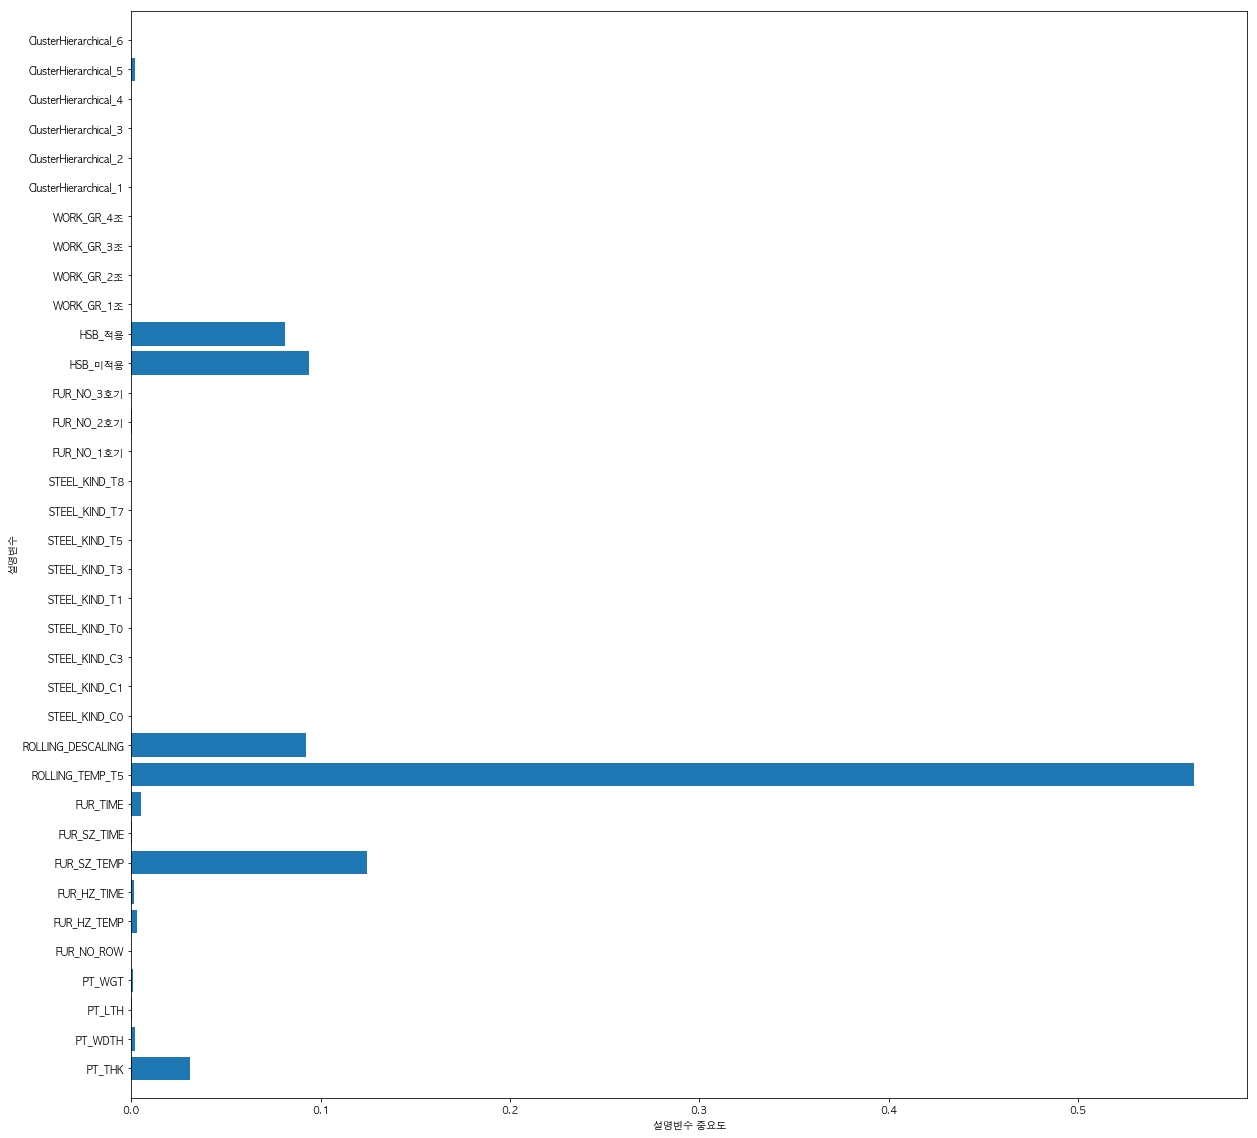

In [58]:
plot_feature_importances(gb_scaled)

>scale 조정 후에도 마찬가지로 유의한 변수들이 동일하게 나타났다.

# Step4. 모델평가

In [59]:
model = ["Logistic", "DecisionTree", "RandomForest", "GradientBoosting"]
train_accuracy = []
test_accuracy = []
model_f1_score = []
train_accuracy.append(log_train_acc)
test_accuracy.append(log_test_acc)
model_f1_score.append(log_f1_score)

train_accuracy.append(tree_train_acc)
test_accuracy.append(tree_test_acc)
model_f1_score.append(tree_f1_score)

train_accuracy.append(rf_train_acc)
test_accuracy.append(rf_test_acc)
model_f1_score.append(rf_f1_score)

train_accuracy.append(gb_train_acc)
test_accuracy.append(gb_test_acc)
model_f1_score.append(gb_f1_score)

In [60]:
ds_eval = pd.DataFrame(index = model)
ds_eval["TrainAccuracy"] = train_accuracy
ds_eval["TestAccuracy"] = test_accuracy
ds_eval["F1Score"] = model_f1_score
ds_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score
Logistic,0.878,0.863,0.786
DecisionTree,0.982,0.986,0.975
RandomForest,0.992,0.972,0.949
GradientBoosting,1.000,0.991,0.984


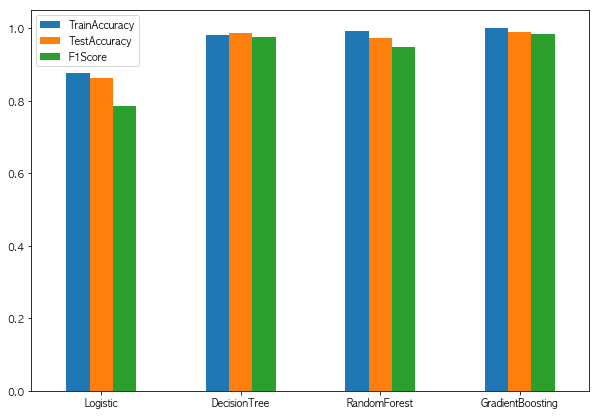

In [68]:
ds_eval.plot.bar(rot = 0, figsize = (10, 7))

>GradientBoosting이 가장 높은 정확도와 F1 Score를 보였다. 따라서 주요 설명변수를 GradientBoosting을 통해 나온 변수로 판단할 것이다.

# Step5. 결론

# 결론
    *GradientBoosting을 사용했을 때의 설명변수 중요도

In [72]:
ds_feature_importance = pd.DataFrame()
ds_feature_importance["feature"] = ds_train_x.columns
ds_feature_importance["importance"] = gb_scaled.feature_importances_
ds_feature_importance.sort_values(by="importance",ascending=False, inplace = True)
ds_feature_importance[:6].round(3)

,feature,importance
10,ROLLING_TEMP_T5,0.561
7,FUR_SZ_TEMP,0.124
24,HSB_미적용,0.094
11,ROLLING_DESCALING,0.092
25,HSB_적용,0.081
0,PT_THK,0.031


# 결론
    *Logistic으로 본 영향도

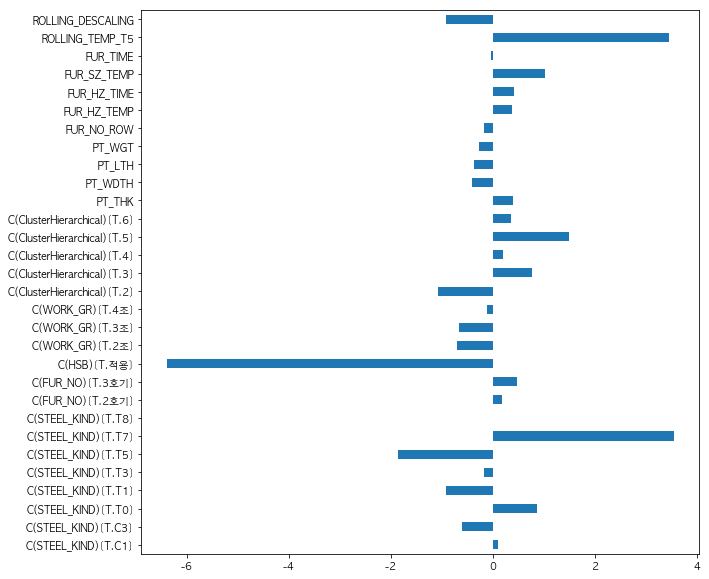

In [74]:
ds_log_scaled_coef.plot.barh(y = "Coef", legend = False, figsize= (10, 10))

>GradientBoosting 모델의 결과로 나온 주요인자는 다음과 같다.<br/>
    * ROLLING_TEMP_T5, FUR_SZ_TEMP, HSB, ROLLING_DESCALING, PT_THK<br/>
가열대 온도, 가열로 균열대 온도, HSB 적용 여부, 압연 중 Descaling 횟수, Plate 두께이다. 그리고 앞서 탐색적 분석에서 가열로 균열대 온도와 압연온도(FUR_EXTEMP)이 완벽히 정비례해 압연온도를 제거했었다. 따라서 압연온도 또한 주요 인자라고 볼 수 있다.<br/>
또한 Logistic으로 나온 중요도를 봤을 때, 각 변수의 온도를 높일지, 두께의 크기가 얼마나 되야할지, HSB를 적용할 지 말지를 결정할 수 있다.

# 정리
>압연공정에서 SCALE발생을 줄이기 위한 방법은 다음과 같다. <br/>
1. 가열대 온도를 낮춘다.
2. 가열로 균열대 온도를 낮춘다.
3. HSB를 적용한다.
4. 압연 중 Descailing 횟수를 늘린다.
5. Plate 두께를 얇게 한다.  <br/>
>
>탐색적 분석에서 그래프를 통해 미리 분석한 결과와 어느정도 일치하는 결과를 도출했다.